In [2]:
'''
Practica de redes elasticas para el curso de IA aplicada a economia y finanzas
Autor: Rolando Gonzales Martinez
'''
# Importando librerias:
import pandas as pd

In [4]:
# Cargando datos:
df = pd.read_csv('fraudes_tarjetascredito.csv')
'''
Diccionario:
distancia_hogar
distance_transaccion
precio_compra
mismo_vendedor
chip
pin
online
fraude
'''

'\nDiccionario:\ndistancia_hogar\ndistance_transaccion\nprecio_compra\nmismo_vendedor\nchip\npin\nonline\nfraude\n'

In [6]:
df.head(5)

,distancia_hogar,distance_transaccion,precio_compra,mismo_vendedor,chip,pin,online,fraude
0,2.131956,56.372401,6.358667,1,0,0,1,1
1,3.803057,67.241081,1.872950,1,0,0,1,1
2,15.694986,175.989182,0.855623,1,0,0,1,1
3,26.711462,1.552008,4.603601,1,1,0,1,1
4,10.664474,1.565769,4.886521,1,0,0,1,1


In [8]:
import matplotlib.pyplot as plt

(array([91251.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 87403.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

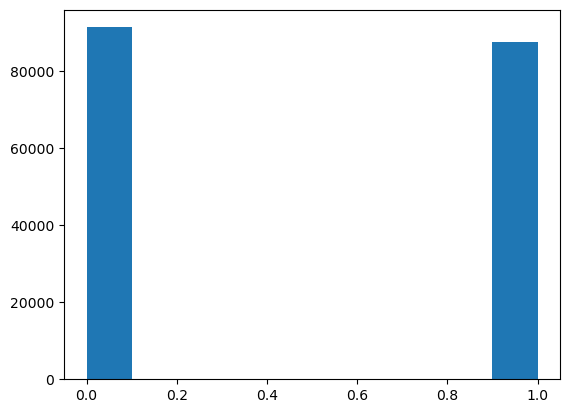

In [10]:
plt.hist(df.fraude)

(array([9.9866e+04, 3.6862e+04, 2.2731e+04, 8.8450e+03, 4.3180e+03,
        2.2170e+03, 1.2790e+03, 7.8700e+02, 4.9300e+02, 3.5800e+02,
        2.3000e+02, 1.4400e+02, 1.0500e+02, 9.2000e+01, 8.3000e+01,
        3.6000e+01, 3.4000e+01, 3.2000e+01, 2.6000e+01, 1.8000e+01,
        1.8000e+01, 1.4000e+01, 8.0000e+00, 7.0000e+00, 1.0000e+01,
        6.0000e+00, 1.0000e+00, 5.0000e+00, 1.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        3.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

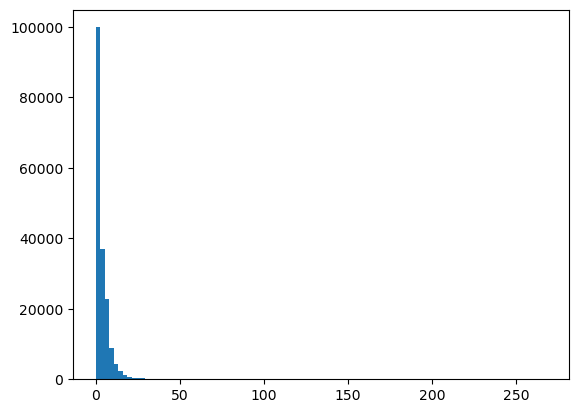

In [12]:
plt.hist(df.precio_compra, bins = 100)

In [ ]:
# Pre-procesamiento (limpieza datos):
df.rename(columns={'distance_transaccion': 'distancia_transaccion'}, inplace=True)

In [ ]:
# Importando librerias para dividir los datos
from sklearn.model_selection import train_test_split

In [ ]:
# Particionando los datos:
porcentaje_test = 0.30 # 30%
semilla = 123

X = df.drop(columns=['fraude'])   # Variables potencialmente explicativas (features)
y = df['fraude']  # Variable dependiente (target)

# Split the data into training and testing sets
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(X, y, 
                                                  test_size=porcentaje_test, 
                                                  random_state=semilla)
print(X.columns)
y

In [ ]:
# Importando librerias relevantes para hacer un modelo ML
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score

In [ ]:
# Preparamiento de datos: estandarizacion
scaler = StandardScaler()
X_entrenamiento_escalado = scaler.fit_transform(X_entrenamiento)
X_test_escalado = scaler.transform(X_test)

In [ ]:
# Especificando modelo ML
# Hiperparametros de la red elastica
alpha = 0.1  # Regularizacion
l1_ratio = 0.5  # ratio L1 a L2 
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

In [ ]:
# Estimando el modelo
elastic_net.fit(X_entrenamiento_escalado, y_entrenamiento)

In [27]:
# Realizando predicciones
y_predicciones = elastic_net.predict(X_test_escalado)
y_predicciones_binarias = np.round(y_predicciones)  
# Establecer un umbral para convertir las probabilidades en clases binarias (0 o 1)
umbral = 0.5
y_predicciones_binarias = (y_predicciones >= umbral).astype(int)

In [29]:
# Evaluatando el modelo:
accuracy = accuracy_score(y_test, y_predicciones_binarias)
print(f"Exactitud del modelo: {accuracy:.4f}")

Exactitud del modelo: 0.8978


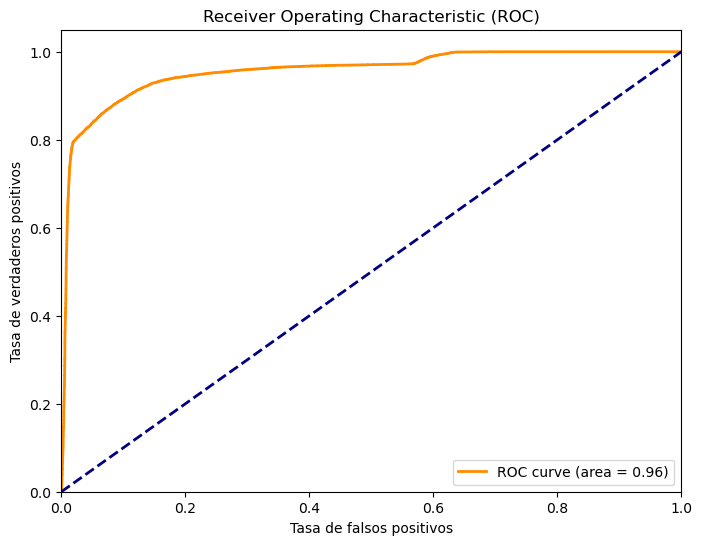

In [31]:
from sklearn.metrics import roc_curve, auc
#curva ROC curve and AUC
fpr, tpr, umbrales = roc_curve(y_test, y_predicciones)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score

# y_true: etiquetas verdaderas (0s y 1s)
# y_pred_prob: probabilidades predichas por el modelo para la clase positiva
auc_score = roc_auc_score(y_test, y_predicciones)
auc_score

0.9566716465293809

In [35]:
Gini = 2*auc_score - 1
Gini

0.9133432930587617

In [37]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Matriz de confusion:
matcon = confusion_matrix(y_test, y_predicciones_binarias)
matcon

# Calcular el total de la matriz de confusión
total = np.sum(matcon)

# Calcular la matriz de porcentajes
mc_porcentaje = matcon /total * 100
mc_porcentaje

array([[47.15749016,  3.7968543 ],
       [ 6.42200123, 42.62365431]])

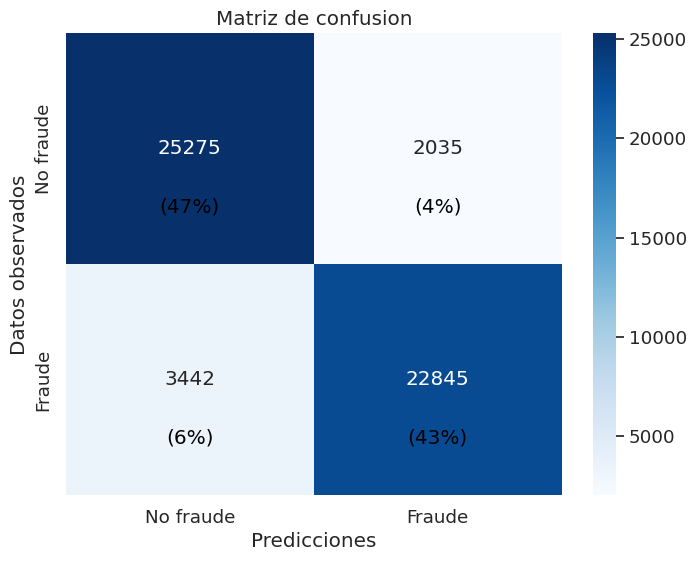

In [39]:
# Create a figure and axis
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Create a heatmap
sns.heatmap(matcon, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No fraude", "Fraude"],
            yticklabels=["No fraude", "Fraude"])

# Agregar los valores totales debajo de las frecuencias
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.75, f'({mc_porcentaje[i, j]:.0f}%)',
                 ha='center', va='center', color='black')
        
plt.xlabel("Predicciones")
plt.ylabel("Datos observados")
plt.title("Matriz de confusion")

plt.show()